In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle
from xgboost import plot_tree


In [3]:
# #############################################################################
# Load data
#data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = pd.read_csv('../../RealData/RealData_Small.csv')


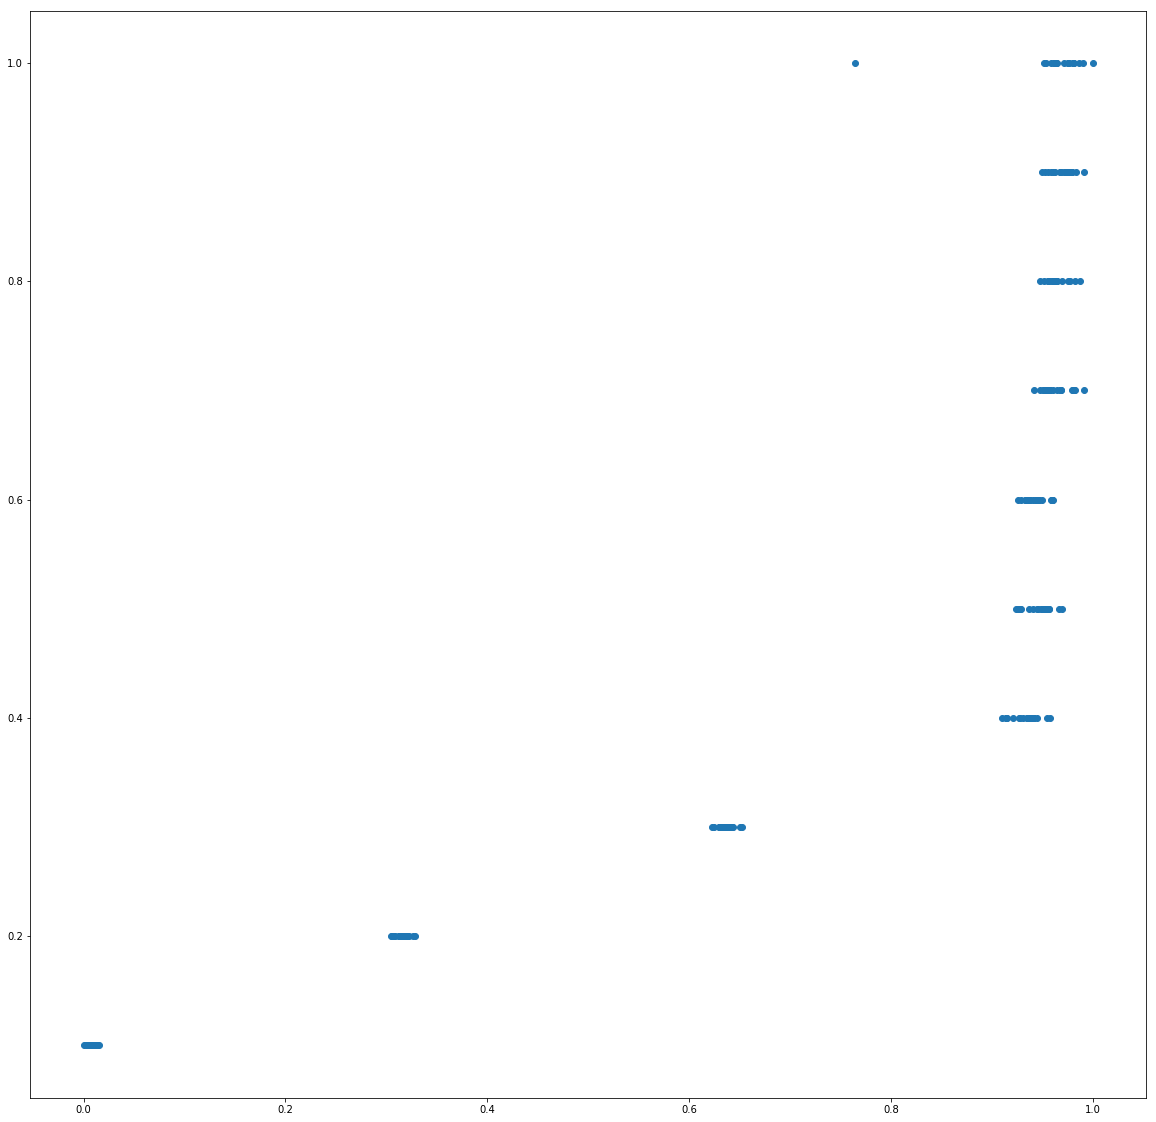

In [4]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']


X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)


fig = plt.figure(figsize=(20, 20))
plt.scatter(X,y)
plt.show()
    

n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [5]:
# #############################################################################
# Fit XGB regression model
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model, {'max_depth': [1, 2, 4, 6, 8], 'n_estimators': [ 50, 100, 110, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-4.025132343771534
{'max_depth': 8, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
prediction = clf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Throuput,Actual,Predicted
0,0.958580,0.9,0.612524
1,0.961171,0.9,0.724165
2,0.952763,0.9,0.511698
3,0.972611,0.9,0.516984
4,0.956083,0.9,0.695864
5,0.983172,0.9,0.707056
6,0.971582,0.9,0.516984
7,0.968373,0.9,0.701370
8,0.949398,0.9,0.590243
9,0.979251,0.9,0.702394


Text(0, 0.5, 'Predicted Y')

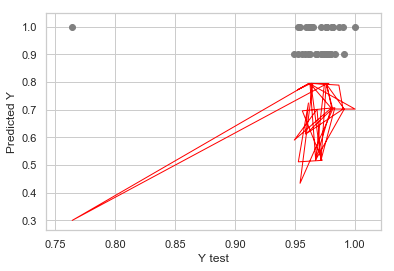

In [17]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=1)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


#sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
#sns.residplot(X_test.flatten(), y_test, lowess=True, color="g")

In [ ]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



In [8]:
# save the model to disk
filename = '../models/XGB_model_realData.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
data = scaler.transform(np.float32([[10]])) 
print(data)

[[-0.26880404]]


In [10]:
clf.predict([[0.987044]])

array([0.7767379], dtype=float32)